# Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

In [2]:
root = './DIP_2019_A3/'

## Part 1 : 1D Fast Fourier

> In the implementation here, if the input signal is not a perfect power of 2 then it is padded with zeros to make the size equal to the next power of 2

In [3]:
def fft(arr):
    p2 = math.ceil(math.log(arr.size,2))
    padz = int(math.pow(2, p2) - arr.size)
    arr = np.concatenate((np.zeros(padz, dtype=arr.dtype), arr))
    if arr.size == 1:
        return arr
    else:
        evenfft = fft(arr[::2])
        oddfft = fft(arr[1::2])
        mult = np.exp(-2j * np.pi * np.arange(arr.size) / arr.size)
        out = np.hstack((evenfft+mult[:int(arr.size/2)]*oddfft, evenfft+mult[int(arr.size/2):]*oddfft))
        return out

##### Testing the correctness

In [4]:
test = np.random.random(512)
a = fft(test)
b = np.fft.fft(test)
print(np.allclose(a,b))

True


## Part 2: 2D fft using 1D fft function

> using separability of 2D fourier transform, fft of 2D matrix x is equivalent to fft(fft(x).T).T

In [5]:
def fft2D(arr):
    rowfft = np.apply_along_axis(fft, 1, arr)
    colfft = np.apply_along_axis(fft, 1, rowfft.T)
    return colfft.T

##### Testing the correctness

In [6]:
test = np.random.random(256*256)
test = test.reshape((256,256))
a = fft2D(test)
b = np.fft.fft2(test)
print(np.allclose(a,b))

True


### Using implemented fft2

In [7]:
img = cv2.imread(root+'lena.jpg', cv2.IMREAD_GRAYSCALE)

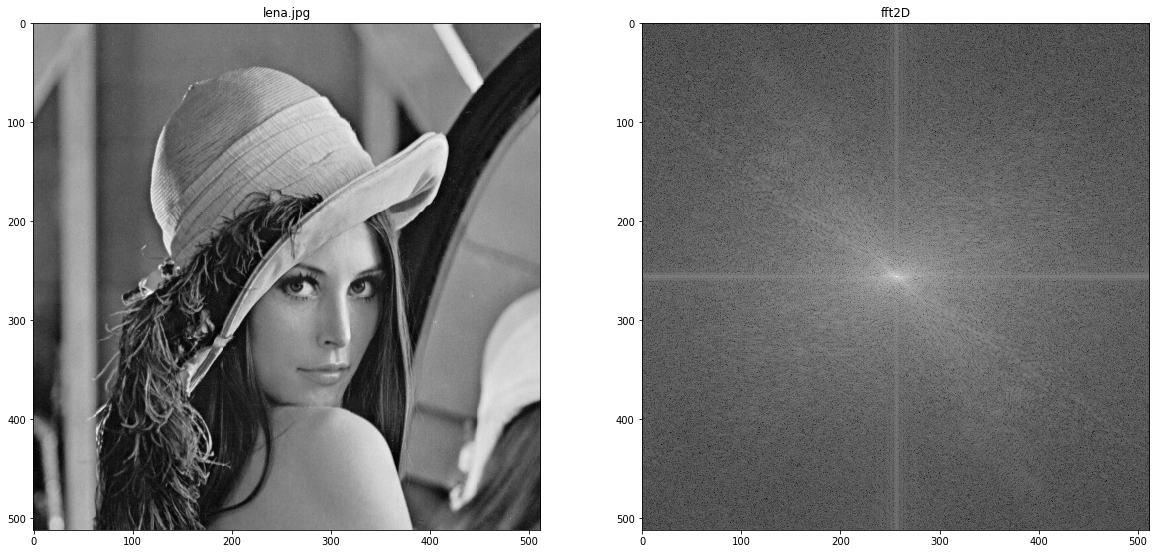

In [8]:
fft_img = np.fft.fftshift(fft2D(img))
_,plts = plt.subplots(1,2,figsize=(20,20))
plts[0].imshow(img, cmap='gray')
plts[0].set_title('lena.jpg')
plts[1].imshow(np.log(1+np.abs(fft_img)), cmap='gray')
plts[1].set_title('fft2D')
plt.show()